In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [3]:
data = pd.read_excel("/Users/latheefkummath/Desktop/DATAMITES/Projects/Project - 1 FlightFarePrediction/AirlineFair-Prediction-DataMites_Project/data/Flight_Fare.xlsx")

In [4]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.shape

(10683, 11)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
data.duplicated().sum()

220

In [10]:
data[data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
data.dropna(inplace = True )

In [12]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
data.drop(['Additional_Info'], axis = 1 , inplace = True )

In [14]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302


In [15]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Price               int64
dtype: object

In [16]:
data[data['Total_Stops'] == '2 stops'].count()

Airline            1520
Date_of_Journey    1520
Source             1520
Destination        1520
Route              1520
Dep_Time           1520
Arrival_Time       1520
Duration           1520
Total_Stops        1520
Price              1520
dtype: int64

In [17]:
data['Airline'].nunique()

12

In [18]:
data.drop_duplicates(inplace = True )

In [19]:
train_data = data 

In [20]:
train_data 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,12648


In [21]:
def change_to_datetime(col):
    train_data[col] = pd.to_datetime(train_data[col])

In [22]:
change_to_datetime("Date_of_Journey")

/var/folders/c_/hj38n26s23qc2br3kr28h8n80000gn/T/ipykernel_36927/3421896406.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  train_data[col] = pd.to_datetime(train_data[col])


In [23]:
import warnings 

In [24]:
from warnings import filterwarnings 
filterwarnings("ignore")

In [25]:
change_to_datetime("Dep_Time")
change_to_datetime("Arrival_Time")

In [26]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Price                       int64
dtype: object

In [27]:
train_data.head(4)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-07 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-07 05:50:00,2025-12-07 13:15:00,7h 25m,2 stops,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-07 09:25:00,2025-06-10 04:25:00,19h,2 stops,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-07 18:05:00,2025-12-07 23:30:00,5h 25m,1 stop,6218


In [28]:
data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2025-12-07 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,3897
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-12-07 05:50:00,2025-12-07 13:15:00,7h 25m,2 stops,7662
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2025-12-07 09:25:00,2025-06-10 04:25:00,19h,2 stops,13882
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,2025-12-07 18:05:00,2025-12-07 23:30:00,5h 25m,1 stop,6218
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,2025-12-07 16:50:00,2025-12-07 21:35:00,4h 45m,1 stop,13302
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-04-09,Kolkata,Banglore,CCU → BLR,2025-12-07 19:55:00,2025-12-07 22:25:00,2h 30m,non-stop,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2025-12-07 20:45:00,2025-12-07 23:20:00,2h 35m,non-stop,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2025-12-07 08:20:00,2025-12-07 11:20:00,3h,non-stop,7229
10681,Vistara,2019-03-01,Banglore,New Delhi,BLR → DEL,2025-12-07 11:30:00,2025-12-07 14:10:00,2h 40m,non-stop,12648


In [29]:
train_data['Arrival_Hour'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour

In [30]:
train_data['Dept_Hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour

In [31]:
train_data['Arrival_Min'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute
train_data['Dept_Min'] = pd.to_datetime(train_data['Dep_Time']).dt.minute

In [32]:
train_data.drop(['Arrival_Time','Dep_Time'],axis = 1 , inplace = True)

In [33]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,1,22,10,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,13,5,15,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,13882,4,9,25,25


In [34]:
def standardize_duration(x):
    if 'h' not in x :
        x = '0h'+' '+x
    elif 'm' not in x : 
        x = x+' '+'0m'
    return x

In [35]:
train_data['Duration'] = train_data['Duration'].apply(standardize_duration)

In [36]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [37]:
stops = {'non-stop':0 ,'2 stops' : 2 , '1 stop' : 1,'3 stops' : 3,'4 stops' : 4}

In [38]:
train_data['Total_Stops'] = train_data['Total_Stops'].map(stops)

In [39]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,1,22,10,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,13,5,15,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,4,9,25,25


In [40]:
def value_count(col):
    print(train_data[col].value_counts())

In [41]:
for col in ['Airline','Source','Destination','Total_Stops']:
    value_count(col)
    print('*************************************************')

Airline
Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
*************************************************
Source
Delhi       4345
Kolkata     2860
Banglore    2179
Mumbai       697
Chennai      381
Name: count, dtype: int64
*************************************************
Destination
Cochin       4345
Banglore     2860
Delhi        1265
New Delhi     914
Hyderabad     697
Kolkata       381
Name: count, dtype: int64
*************************************************
Total_Stops
1    5625
0    3475
2    1318
3     

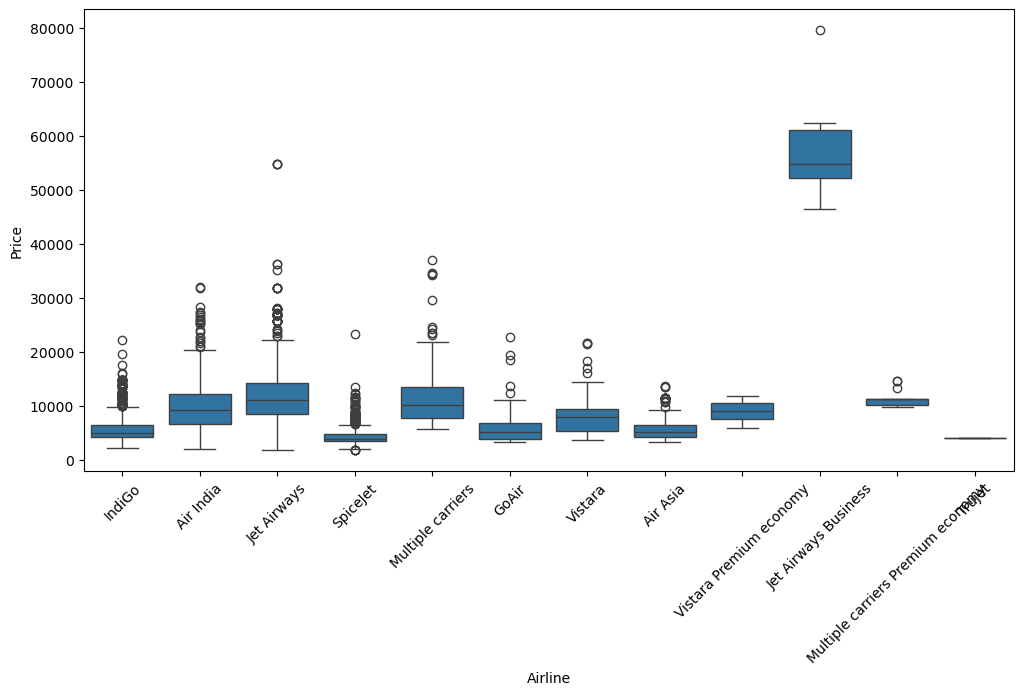

In [42]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Airline' , y = 'Price' , data = train_data)
plt.xticks(rotation=45)
plt.show()

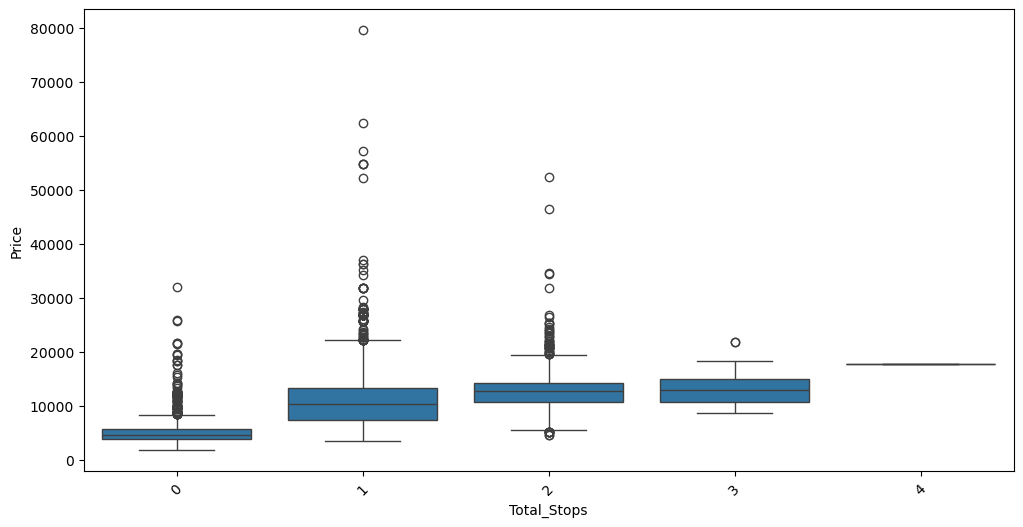

In [43]:
plt.figure(figsize=(12,6))
sns.boxplot(x = 'Total_Stops' , y = 'Price' , data = train_data)
plt.xticks(rotation=45)
plt.show()

In [44]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,1,22,10,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,13,5,15,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,4,9,25,25


In [45]:
int(train_data['Duration'][0].split(' ')[0][0:-1])

2

In [46]:
train_data['Duration_Hour'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]) )

In [47]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,1,22,10,20,2
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,13,5,15,50,7
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,4,9,25,25,19


In [48]:
train_data['Duration_Min'] = train_data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [49]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,0,3897,1,22,10,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,7662,13,5,15,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2,13882,4,9,25,25,19,0


In [50]:
train_data.drop(['Duration'],inplace = True, axis = 1)

In [51]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0,3897,1,22,10,20,2,50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,50,7,25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,25,19,0


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

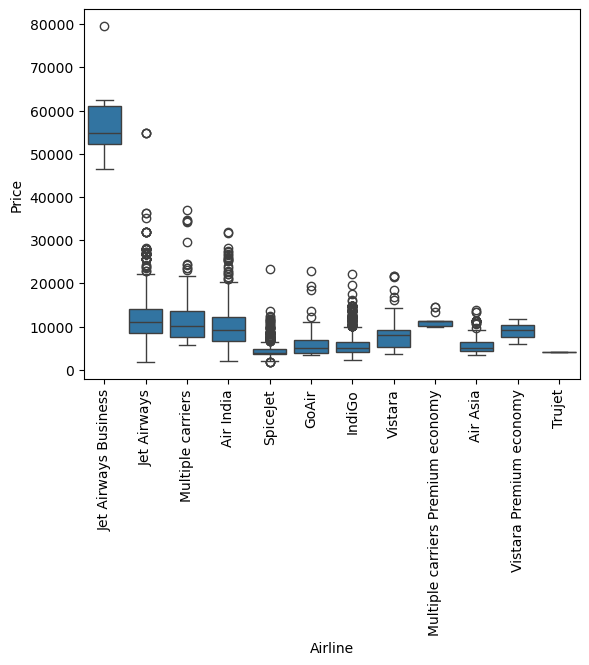

In [52]:
sns.boxplot(x='Airline' , y = "Price" , data = train_data.sort_values('Price' , ascending = False))
plt.xticks(rotation = 'vertical')

In [53]:
cat_col = [col for col in train_data.columns if train_data[col].dtype == 'object']

In [54]:
cat_col

['Airline', 'Source', 'Destination', 'Route']

In [55]:
num_col = [col for col in train_data.columns if train_data[col].dtype != 'object']
num_col

['Date_of_Journey',
 'Total_Stops',
 'Price',
 'Arrival_Hour',
 'Dept_Hour',
 'Arrival_Min',
 'Dept_Min',
 'Duration_Hour',
 'Duration_Min']

In [56]:
train_data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [57]:
train_data['Source'].apply(lambda x : 1 if x == 'Banglore' else 0)

0        1
1        0
2        0
3        0
4        1
        ..
10678    0
10679    0
10680    1
10681    1
10682    0
Name: Source, Length: 10462, dtype: int64

In [58]:
for col in ['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai']:
    train_data['Source_' + col] = train_data['Source'].apply(lambda x : 1 if x == col else 0)

In [59]:
train_data.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,0,3897,1,22,10,20,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,50,7,25,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,25,19,0,0,0,1,0,0
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1,6218,23,18,30,5,5,25,0,1,0,0,0
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1,13302,21,16,35,50,4,45,1,0,0,0,0


In [60]:
train_data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [61]:
train_data['Destination'].replace('New Delhi','Delhi' , inplace = True)

In [62]:
train_data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [63]:
Airlines = train_data.groupby(['Airline'])['Price'].mean().sort_values().index
Airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [64]:
airline_dict = {index :key  for key , index in enumerate(Airlines , 0)}
airline_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [65]:
train_data['Airline'] = train_data['Airline'].map(airline_dict)

In [66]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,0,3897,1,22,10,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,50,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,25,19,0,0,0,1,0,0


In [67]:
dum_data = pd.read_excel("/Users/latheefkummath/Desktop/DATAMITES/Projects/Project - 1 FlightFarePrediction/AirlineFair-Prediction-DataMites_Project/data/Flight_Fare.xlsx")

In [68]:
train_data['Airline'] = dum_data['Airline']

In [69]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,0,3897,1,22,10,20,2,50,1,0,0,0,0
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,50,7,25,0,1,0,0,0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,25,19,0,0,0,1,0,0


In [70]:
train_data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [71]:
train_data['Airline'] = train_data['Airline'].str.strip()
train_data['Airline'] = train_data['Airline'].str.replace('\xa0','')

In [72]:
Airlines = train_data.groupby(['Airline'])['Price'].mean().sort_values().index
Airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [73]:
airline_dict = {index :key  for key , index in enumerate(Airlines , 0)}
airline_dict

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [74]:
train_data['Airline'] = train_data['Airline'].map(airline_dict)

In [75]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,Dept_Min,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,0,3897,1,22,10,20,2,50,1,0,0,0,0
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,50,7,25,0,1,0,0,0
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,25,19,0,0,0,1,0,0


In [76]:
train_data['Journey_month'] = train_data['Date_of_Journey'].dt.month
train_data['Journey_year'] = train_data['Date_of_Journey'].dt.year
train_data['Journey_day'] = train_data['Date_of_Journey'].dt.day

In [77]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,...,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Journey_month,Journey_year,Journey_day
0,3,2019-03-24,Banglore,Delhi,BLR → DEL,0,3897,1,22,10,...,2,50,1,0,0,0,0,3,2019,24
1,7,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,7662,13,5,15,...,7,25,0,1,0,0,0,5,2019,1
2,10,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,2,13882,4,9,25,...,19,0,0,0,1,0,0,6,2019,9


In [78]:
dest= train_data.groupby(['Destination'])['Price'].mean().sort_values().index

In [79]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [80]:
dest_dict = {key : index for index , key in enumerate(dest , 0)}

In [81]:
dest_dict

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [82]:
train_data['Destination'] = train_data['Destination'].map(dest_dict)

In [83]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,...,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Journey_month,Journey_year,Journey_day
0,3,2019-03-24,Banglore,2,BLR → DEL,0,3897,1,22,10,...,2,50,1,0,0,0,0,3,2019,24
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,2,7662,13,5,15,...,7,25,0,1,0,0,0,5,2019,1
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,2,13882,4,9,25,...,19,0,0,0,1,0,0,6,2019,9


In [84]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Total_Stops,Price,Arrival_Hour,Dept_Hour,Arrival_Min,...,Duration_Hour,Duration_Min,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai,Journey_month,Journey_year,Journey_day
0,3,2019-03-24,Banglore,2,BLR → DEL,0,3897,1,22,10,...,2,50,1,0,0,0,0,3,2019,24
1,7,2019-05-01,Kolkata,3,CCU → IXR → BBI → BLR,2,7662,13,5,15,...,7,25,0,1,0,0,0,5,2019,1
2,10,2019-06-09,Delhi,4,DEL → LKO → BOM → COK,2,13882,4,9,25,...,19,0,0,0,1,0,0,6,2019,9


In [85]:
train_data.drop(['Date_of_Journey','Source','Route'],axis = 1 , inplace = True )

<Axes: ylabel='Price'>

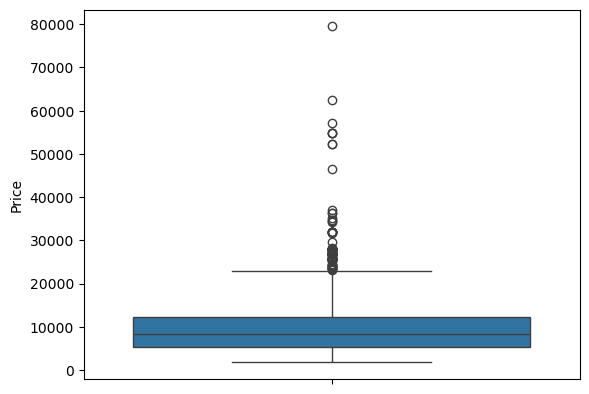

In [86]:
sns.boxplot(train_data['Price'])

In [87]:
Q1 = train_data['Price'].quantile(0.25)
Q3 = train_data['Price'].quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

In [88]:
lower , upper

(-5457.125, 23025.875)

In [89]:
train_data = train_data[(train_data["Price"] >= lower) & (train_data["Price"] <= upper)]

In [90]:
train_data.shape

(10368, 18)

In [91]:
X = train_data.drop(['Price'],axis = 1)

In [92]:
Y = train_data['Price']

In [93]:
from sklearn.feature_selection import mutual_info_regression

mi_scores = mutual_info_regression(X, Y)

In [94]:
mi_scores = pd.DataFrame(mi_scores , index = X.columns)

In [95]:
mi_scores.sort_values(by = 0 ,ascending = False)

,0
Airline,1.317786
Arrival_Hour,1.137881
Duration_Hour,1.097135
Destination,1.060121
Arrival_Min,0.902757
Dept_Hour,0.899678
Total_Stops,0.767003
Dept_Min,0.745372
Duration_Min,0.666516
Journey_month,0.625595


In [96]:
from sklearn import metrics

In [97]:
def predict(ml_model,x_train,y_train,x_test,y_test):
    model = ml_model.fit(x_train,y_train)
    print('Training Score : {}'.format(model.score(x_train,y_train)))
    y_prediction =  model.predict(x_test)
    print('\n')
    print('R2 Score : {}'.format(metrics.r2_score(y_test , y_prediction)))
    print('MAE Score : {}'.format(metrics.mean_absolute_error(y_test , y_prediction)))
    print('MSE Score : {}'.format(metrics.mean_squared_error(y_test , y_prediction)))
    print('RMSE Score : {}'.format(np.sqrt(metrics.mean_squared_error(y_test , y_prediction))))

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.2,)

In [99]:
# linear Regression 
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
from sklearn.linear_model import LinearRegression

In [101]:
model_linearRegression = LinearRegression()

In [102]:
predict(model_linearRegression,X_train_scaled,Y_train,X_test_scaled,Y_test)

Training Score : 0.6251417461976803


R2 Score : 0.6364126103078693
MAE Score : 1830.1577141464313
MSE Score : 6127321.551745887
RMSE Score : 2475.342713998586


In [103]:
from sklearn.ensemble import RandomForestRegressor
model_RandomForestRegressor = RandomForestRegressor()

In [104]:
predict(model_RandomForestRegressor,X_train,Y_train,X_test,Y_test)

Training Score : 0.9479789529240609


R2 Score : 0.821236460515625
MAE Score : 1124.7187801623131
MSE Score : 3012595.373773753
RMSE Score : 1735.6829704107122


In [105]:
from sklearn.model_selection import GridSearchCV

In [106]:
rf = RandomForestRegressor(random_state=42)

In [107]:
param_grid = {
    'n_estimators': [100, 200, 300],          # number of trees
    'max_depth': [None, 10, 20, 30],          # depth of trees
    'min_samples_split': [2, 5, 10],          # minimum samples for split
    'min_samples_leaf': [1, 2, 4],            # minimum samples at leaf node
    'max_features': ['auto', 'sqrt']          # number of features to consider per split
}

In [108]:
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                       # 5-fold cross-validation
    scoring='r2',               # metric
    n_jobs=-1,                  # use all CPU cores
    verbose=2
)

In [ ]:
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=

In [ ]:
print("Best Parameters:", grid_search.best_params_)

In [ ]:
best_rf = grid_search.best_estimator_

In [ ]:
predict(best_rf,X_train,Y_train,X_test,Y_test)

In [ ]:
pip install pickle

In [ ]:
import pickle

In [ ]:
file = open(r'/Users/latheefkummath/Desktop/DATAMITES/Projects/Project - 1 FlightFarePrediction/AirlineFair-Prediction-DataMites_Project/best_model.pkl' , 'wb')

In [ ]:
pickle.dump(best_rf, file)